# **Demo - Scikit-Learn**
This notebook will utilize some of the key functionality of the SciKit-Learn module including pre-processing and modeling. 
 
[Scikit learn](https://scikit-learn.org/stable/) is a popular data science library that is great for implementing basic machine learning models. With very little code you can create various supervised and unsupervised models. It also has lots of great tools for pre-processing, model selection/evaluation, visualizations, and more. It really is a one stop shop for everything data science. 

In [11]:
#!pip install scikit-learn
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

### **Load data**

The data was accessed from [Charlotte's Data Portal](https://data.charlottenc.gov/datasets/charlotte::housing-demand-and-availability-by-income/about) and its source is the [2018 American Community Survey (ACS)](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/ACS2014_2018_PUMS_README.pdf). 

It is a subset of the American Community Survery containing only data about Charlotte households. It contains features about households such a number of rooms, baths, etc. As well as information about those living in the houses such as income, number of children, and more. 

Note that I have already gone through and cleaned the data in a separate notebook which is available on canvas. I dropped a lot of the columns to keep the demo more simple.  

The data is in table format and contains the following features:
- **TEN**: Type of Tenure (Categorical String) 
- **NP**: Number of people living in the household (Numerical Int)
- **NOC**: Number of children living in the household (Numerical Int)
- **HHT**: Household Type (Categorical String) 
- **LNGI**: Limited english speaking household (Boolean Int) 
- **HINCP**: Annual household income (Numerical Float)
- **RNTP**: Monthly rent (Numerical Float)
- **PUMA**: Geographical region (Categorical String)
- **COST_BURDALL**: Whether or not a household is cost burdened (Boolean Int)
- **RMSP**: The number of rooms in the household (Numerical Int)

The columns of the dataa

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('data/clt_housing_cleaned-1.csv')

In [14]:
df.head()

,TEN,NP,NOC,HHT,LNGI,ELEP,VEH,HINCP,RNTP,PUMA,COST_BURDALL,RMSP
0,Rented,5,3.0,"Other family household: Female householder, no...",1.0,100.0,1.0,18000.0,800.0,Charlotte City (Northwest),1.0,5
1,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,120.0,1.0,72000.0,1100.0,Charlotte City (South),0.0,7
2,Rented,2,0.0,Married couple household,1.0,170.0,2.0,56600.0,600.0,Charlotte City (Central),0.0,5
3,Rented,4,2.0,Married couple household,1.0,80.0,2.0,59400.0,800.0,Charlotte City (Southwest),0.0,6
4,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,30.0,1.0,160000.0,1400.0,Charlotte City (Central),0.0,1


In [15]:
df.shape

(1418, 12)

In [16]:
df.dtypes

TEN              object
NP                int64
NOC             float64
HHT              object
LNGI            float64
ELEP            float64
VEH             float64
HINCP           float64
RNTP            float64
PUMA             object
COST_BURDALL    float64
RMSP              int64
dtype: object

In [17]:
df.describe()

,NP,NOC,LNGI,ELEP,VEH,HINCP,RNTP,COST_BURDALL,RMSP
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,2.158674,0.474612,1.070522,113.585331,1.399859,63398.102962,1069.107193,0.453456,4.379408
std,1.298525,0.936060,0.256115,65.377187,0.801498,57072.247797,441.783951,0.498005,1.806418
min,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,70.000000,1.000000,27900.000000,800.000000,0.000000,3.000000
50%,2.000000,0.000000,1.000000,100.000000,1.000000,50000.000000,1000.000000,0.000000,4.000000
75%,3.000000,1.000000,1.000000,140.000000,2.000000,83800.000000,1300.000000,1.000000,5.000000
max,11.000000,6.000000,2.000000,560.000000,5.000000,523000.000000,2800.000000,1.000000,12.000000


As you can see, the dataset has 1418 rows and 12 columns. It is a mix of numerical and categorical data. 

### **Data Pre-processing/Cleaning**
Let's explore the data further and decide what cleaning steps need to be done

In [18]:
df.head()

,TEN,NP,NOC,HHT,LNGI,ELEP,VEH,HINCP,RNTP,PUMA,COST_BURDALL,RMSP
0,Rented,5,3.0,"Other family household: Female householder, no...",1.0,100.0,1.0,18000.0,800.0,Charlotte City (Northwest),1.0,5
1,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,120.0,1.0,72000.0,1100.0,Charlotte City (South),0.0,7
2,Rented,2,0.0,Married couple household,1.0,170.0,2.0,56600.0,600.0,Charlotte City (Central),0.0,5
3,Rented,4,2.0,Married couple household,1.0,80.0,2.0,59400.0,800.0,Charlotte City (Southwest),0.0,6
4,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,30.0,1.0,160000.0,1400.0,Charlotte City (Central),0.0,1


Since we have a good amount of categorical variables, let's see how many bins each of them has

In [19]:
for col in df.columns:
    print(f"{col}:\n {df[col].value_counts()}\n")

TEN:
 TEN
Rented    1418
Name: count, dtype: int64

NP:
 NP
1     550
2     444
3     199
4     140
5      61
6      15
7       5
8       2
9       1
11      1
Name: count, dtype: int64

NOC:
 NOC
0.0    1048
1.0     167
2.0     132
3.0      51
4.0      14
5.0       3
6.0       3
Name: count, dtype: int64

HHT:
 HHT
Married couple household                                         342
Nonfamily household: Female householder: Living alone            302
Other family household: Female householder, no spouse present    252
Nonfamily household: Male householder: Living alone              248
Nonfamily household: Male householder: Not living alone          108
Nonfamily household: Female householder: Not living alone         93
Other family household: Male householder, no spouse present       73
Name: count, dtype: int64

LNGI:
 LNGI
1.0    1318
2.0     100
Name: count, dtype: int64

ELEP:
 ELEP
100.0    168
80.0     143
70.0     117
60.0     108
90.0     104
50.0     103
120.0     90
150.0 

Does anything stand out when looking at this? 

I noticed that **TEN** (tenure) only contained one possible value. This makes that whole feature redudant in this case since it acts as a constant that doesn't give any real information. 

We can also get some hints about the distribution of each feature by looking at the quantities of each unique value. For example we can see the **VEH** is leftward skewed. 

Let's go ahead and drop the TEN feature and then continue to explore the distributions, using visualizations. 

In [20]:
#dropping TEN
df.drop(columns = ['TEN'], inplace = True)

In [21]:
import seaborn as sns

Pairplots are a great visualization for quickly seeing how the features relate to each other and also their individual distributions (on the diagonal). 

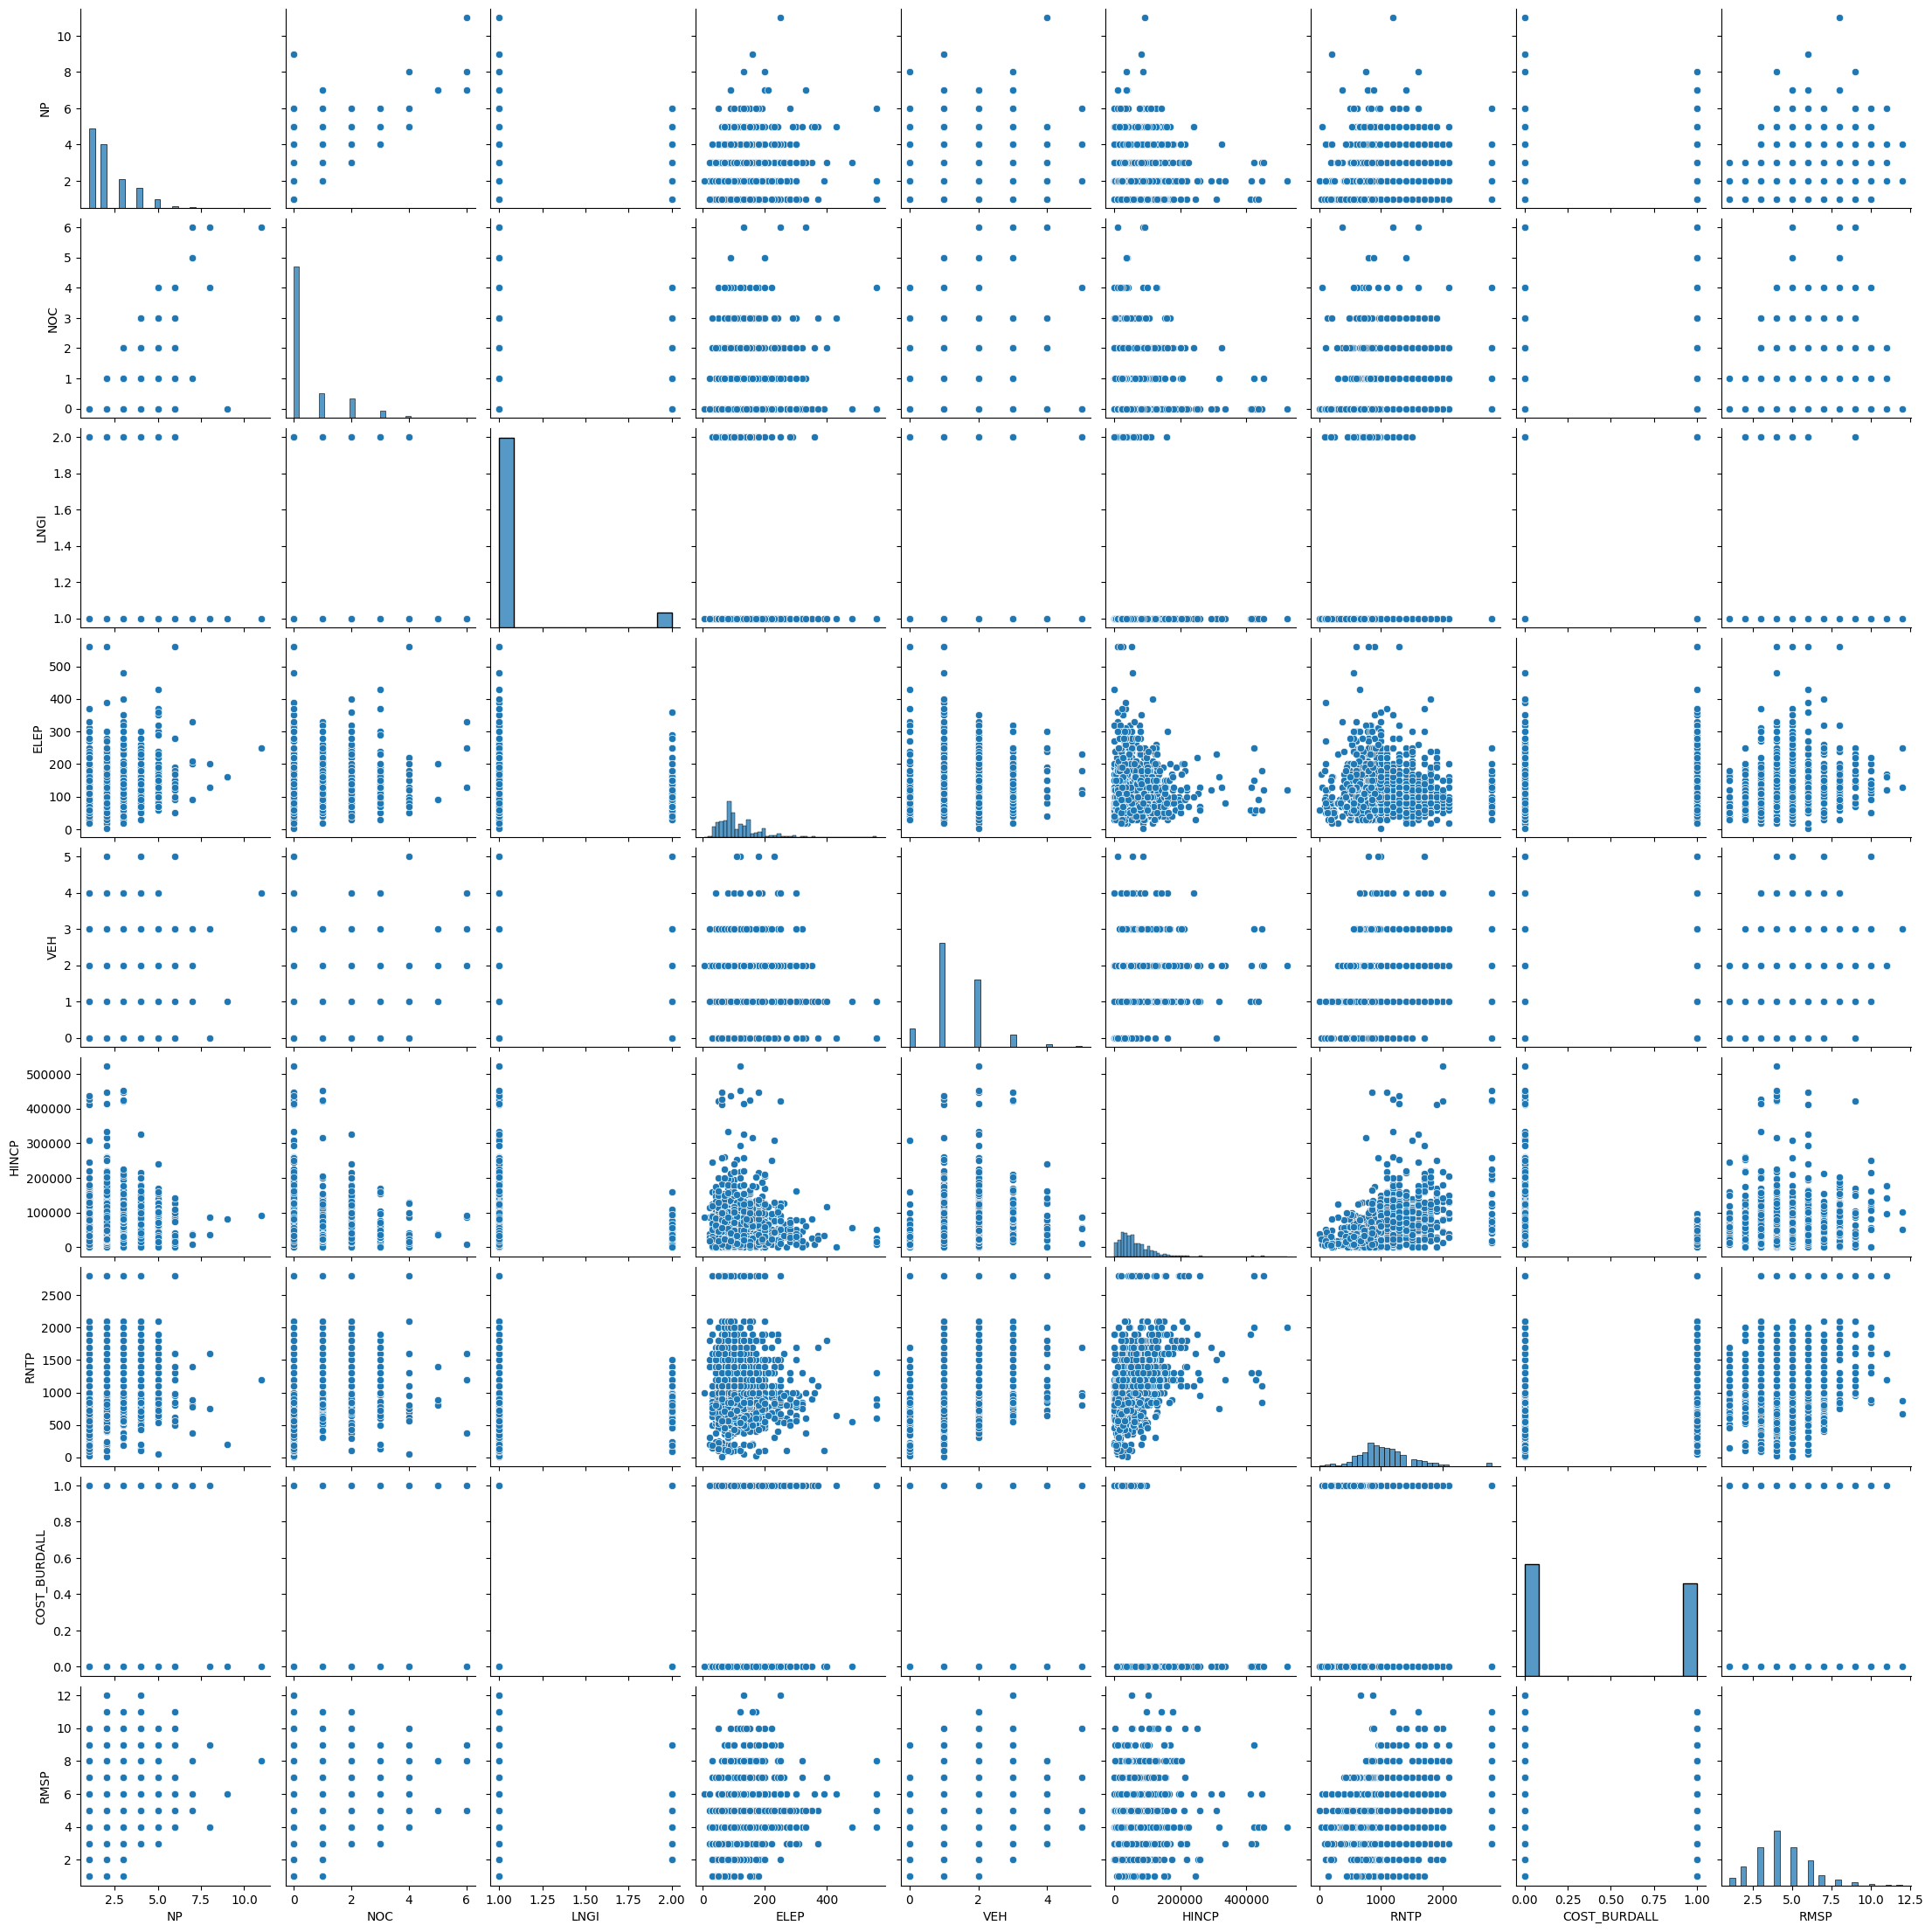

In [22]:
sns.pairplot(data = df)

We can some slight skews in our feature distributions. **Sometimes it is useful to perform transformations to the features to change their distribution**. Depending on what model you are using, different assumptions are made. For example, simple linear regression assumes that the independent (target) variable is normally distributed. 

Seaborn converted our string values to numbers for us, however we will need to do this ourselves before running it in a model. 

Another thing I noticed is that **our numerical values are not all in the same unit**. HINCP (household income) is a yearly value whereas ELEP (electriciy bill) and RNTP (rent) are monthly. Let's convert HINCP to monthly. 

In [23]:
df['HINCP'] = df['HINCP'] / 12 

Let's go ahead and convert our categorical variables to numerical. 

There are two common methods for doing this encoding. We could convert each category to an integer (1 to n-1 : where n is the number of features) or we could create a new column for each value (OneHot Encoding) inwhich contains boolean values. The first option is good for when the data is ordinal but when order is arbitrary we typically use OneHot encoding. 

You can perform OneHot encoding with sklearn, however it is much simpler to do so with Pandas. 

[User guide for preprocessing with sklearn ](https://scikit-learn.org/stable/modules/preprocessing.html)

In [24]:
df = pd.get_dummies(df, columns = ['HHT', 'PUMA'], drop_first=True)

In [25]:
df.head()

,NP,NOC,LNGI,ELEP,VEH,HINCP,RNTP,COST_BURDALL,RMSP,HHT_Nonfamily household: Female householder: Living alone,...,HHT_Nonfamily household: Male householder: Not living alone,"HHT_Other family household: Female householder, no spouse present","HHT_Other family household: Male householder, no spouse present",PUMA_Charlotte City (Northeast),PUMA_Charlotte City (Northwest),PUMA_Charlotte City (South),PUMA_Charlotte City (Southwest),PUMA_Mecklenburg County (East)--Mint Hill & Matthews (North) Towns,"PUMA_Mecklenburg County (North)--Huntersville, Cornelius & Davidson Towns",PUMA_Mecklenburg County (South)--Matthews Town (South)
0,5,3.0,1.0,100.0,1.0,1500.000000,800.0,1.0,5,False,...,False,True,False,False,True,False,False,False,False,False
1,1,0.0,1.0,120.0,1.0,6000.000000,1100.0,0.0,7,False,...,False,False,False,False,False,True,False,False,False,False
2,2,0.0,1.0,170.0,2.0,4716.666667,600.0,0.0,5,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2.0,1.0,80.0,2.0,4950.000000,800.0,0.0,6,False,...,False,False,False,False,False,False,True,False,False,False
4,1,0.0,1.0,30.0,1.0,13333.333333,1400.0,0.0,1,False,...,False,False,False,False,False,False,False,False,False,False


At this point we can go ahead and implement a model using SK-Learn. Since we are covering classification this week, let's implement a decision tree.

Side note: Many models require standardization of data, decision trees are an exception due to how they are constructed. 

### **Modeling**
- Decision Tree: https://scikit-learn.org/stable/modules/tree.html
- Cross Validation: https://scikit-learn.org/stable/modules/cross_validation.html

Before we jump into modeling we first need to identify our target or independent variable. Meaning the feature in-which we wish to predict. 

In this case, I am interested to see how well features of a household could predict whether they are cost-burdened or not. Remember cost-burdened is simply a binary value which is perfectly suited for classification. 


Let's separate our data into a dependent (X) and independent (y) set.  

In [26]:
X = df.drop(columns = ['COST_BURDALL'])
y = df['COST_BURDALL']

Next, we need to separate our data into a training and testing set. This is essential so that we can understand how well our model is performing. If we used *all* of our data to train the model, then we would have no idea how well it performs since there is no more data left to validate it with.

Luckily, sklearn makes this really easy with a single function call.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 ) #80% train, 20% test

In [29]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (1134, 21)
X_test (284, 21)
y_train (1134,)
y_test (284,)


Now that our data is properly split, let's have our first pass at training the model.

We are implementing a decision tree model for this demo, we will learn more about how it works soon!

In [30]:
from sklearn import tree

In [31]:
clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class

In [32]:
clf = clf.fit(X_train, y_train) #fit training data to the model

And just like that... the model is trained!

How is it performing?

### **Inspection and Evaluation**
Feature Importance: https://scikit-learn.org/stable/modules/permutation_importance.html 

Evaluation Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html

In [33]:
#predict values from X_test
predicted = clf.predict(X_test)

In [34]:
predicted

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1.

the values are all 0s and 1s as expected

In [35]:
clf.score(X_test, y_test)

0.9436619718309859

Wow! A that's a really high accuracy score. This sounds great but we should always be skeptical when getting really high 
scores immediately. We need to assure there is not overfitting or high correlation. 

One of the benefits of using decisions trees is that they are known as white-box model. Meaning they are interpretable. By inspecting the nodes of the tree, we can see which features the model emphasized the most. 

In [36]:
import matplotlib.pyplot as plt

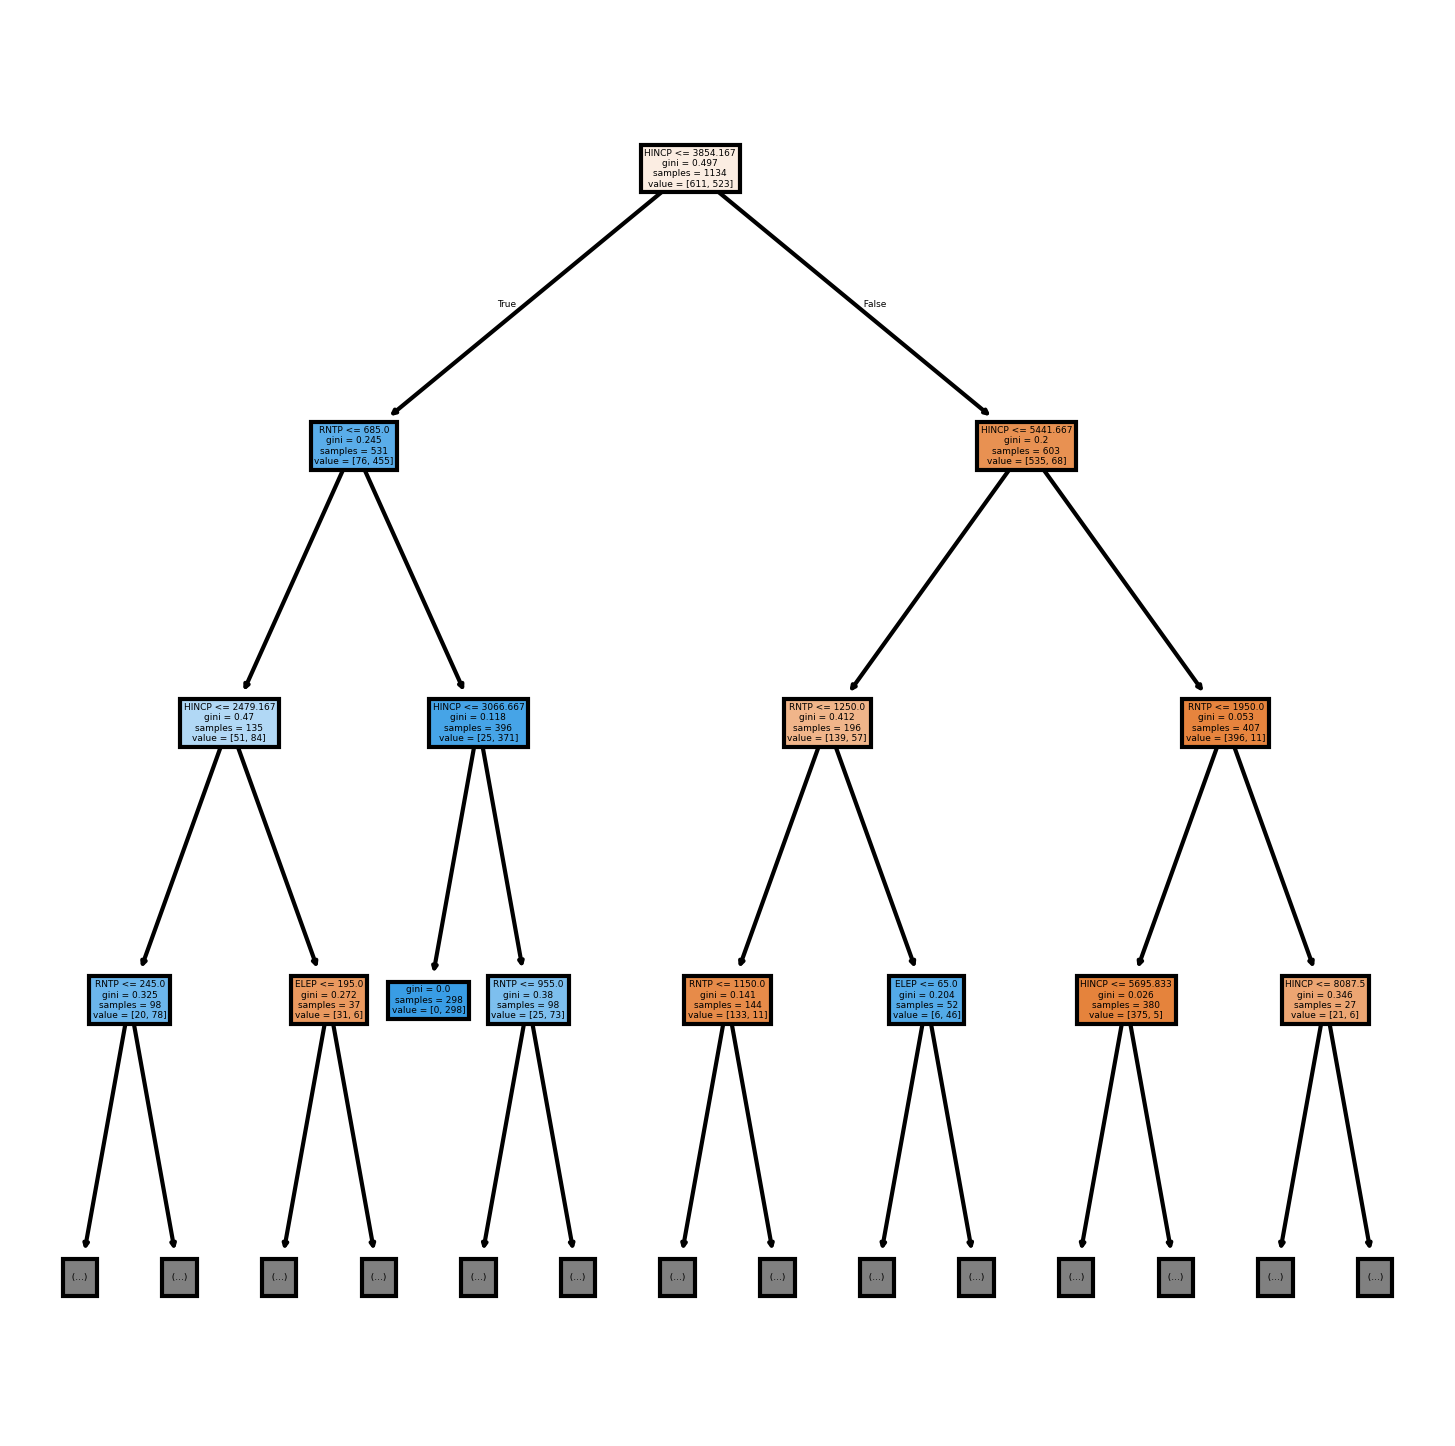

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(clf, max_depth = 3, feature_names = X.columns, filled=True)
plt.show()


After inspecting the diagram, almost all of the nodes are either HINCP or RNTP. This is significant since decision trees place the nodes with least entropy (most information) at the top of the tree. Meaning that these two features are yielding significantly more information than the other features. 

We can verify this further by creating a feature importance plot. 

In [38]:
fi = clf.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/bl/4fb7d5n12kn_hx73_tsnfhhc0000gq/T/ipykernel_31296/1027182984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
/var/folders/bl/4fb7d5n12kn_hx73_tsnfhhc0000gq/T/ipykernel_31296/1027182984.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


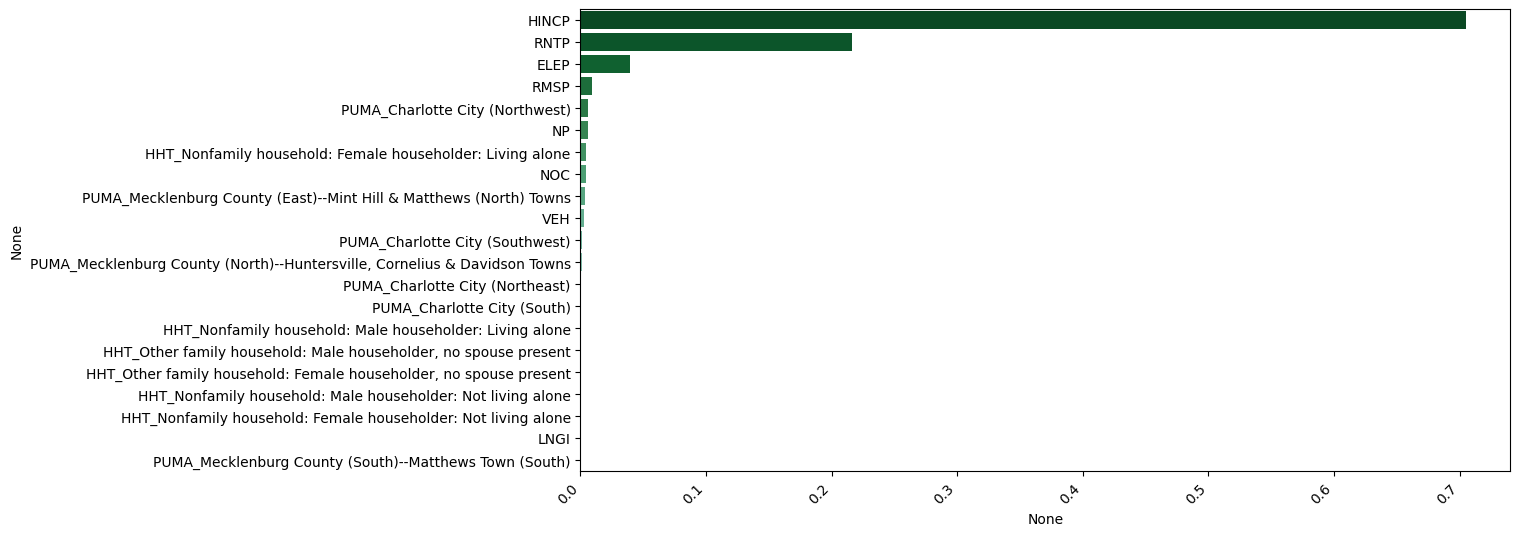

In [39]:
#create bar plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

As we can see, this aligns with what we saw in the tree. More than half of the features were essentially ignored. 

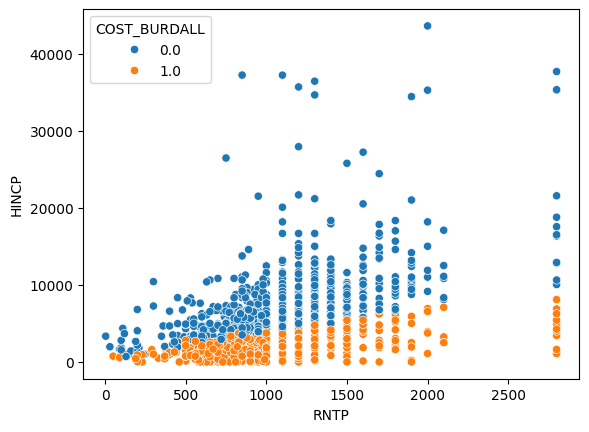

In [40]:
sns.scatterplot(data=df, x='RNTP', y='HINCP', hue = "COST_BURDALL")
plt.show()

As we can see, there is almost a perfect linear separater of our target on these two features. This is because COST_BURDALL is directly derived from a ratio between Income and Rent. We should remove these columns since the point of a model is to generalize the data. This is not a generalization by any means.

### **Modeling - Part 2**
For this next go at modeling, we are going to drop the features mentioned and also implement cross validation to increase model robustness. Cross validation trains and tests models across multiple partitions of the dataset and then scores the average. This helps prevent overfitting 

In [41]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
import numpy as np

In [42]:
X = df.drop(columns = ["COST_BURDALL", "RNTP", "HINCP"]) #dependent set
y = df['COST_BURDALL'] #independent set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 ) #split into training and test

In [43]:
clf = tree.DecisionTreeClassifier() #instantiate decision tree class
clf = clf.fit(X_train, y_train) #fit data

In [44]:
cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)

In [45]:
score = cvs['test_score'].mean()
score

np.float64(0.5930526420936969)

As we can see, our score is much lower than before. It is still better than randomly guessing but clearly not super accurate. 

In [46]:
# each model iteration during cross validation can be accessed
cvs['estimator']

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

Will need to loop over the different classifiers to average out their feature importances

In [47]:
#create a matrix of feature importances across all folds
fi = []
classification_reports = []
for i in cvs['estimator']:
    fi.append(list(i.feature_importances_))
    
    
#average column-wise 
fi_avg = np.mean(fi, axis = 0)

/var/folders/bl/4fb7d5n12kn_hx73_tsnfhhc0000gq/T/ipykernel_31296/2851363132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi_avg)))
/var/folders/bl/4fb7d5n12kn_hx73_tsnfhhc0000gq/T/ipykernel_31296/2851363132.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


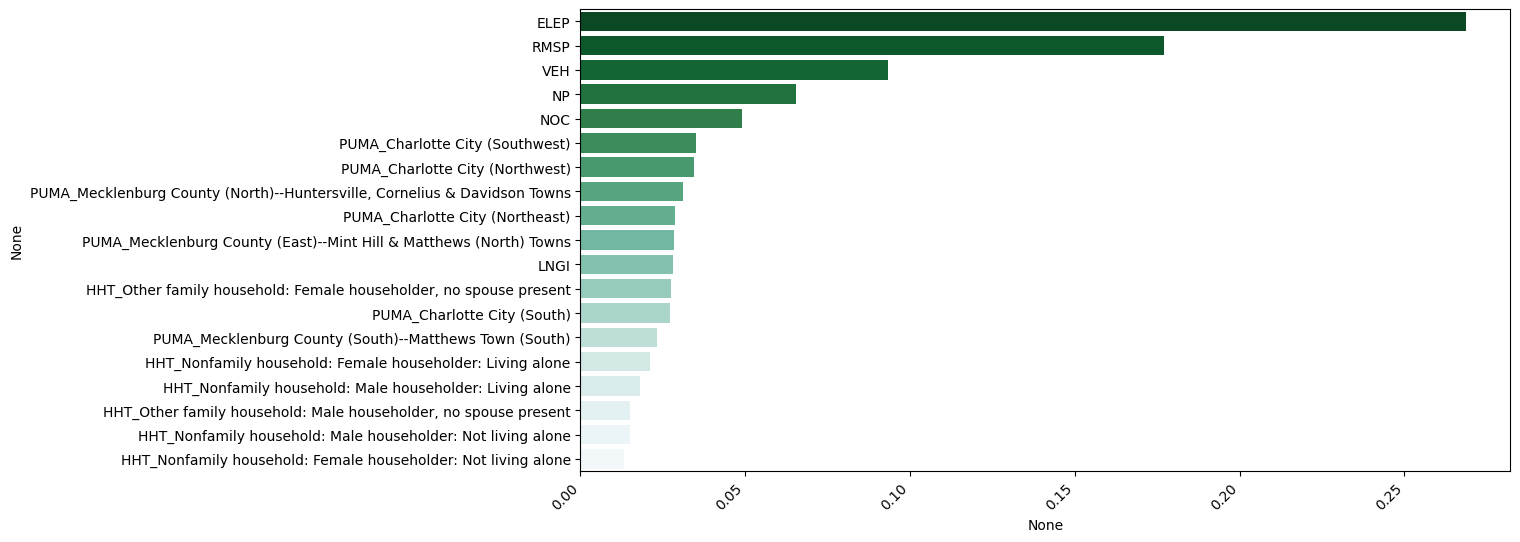

In [48]:
#convert to pandas series with feature names as index
fi_avg = pd.Series(fi_avg, index = X.columns).sort_values(ascending=False) 

#create plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi_avg)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

As we can see, many more features are utilized now

Note: for the following tree plot and classification report, it is analyzing a single classifier, not the overall cross validation. However, each classifier should be pretty similar to each other.

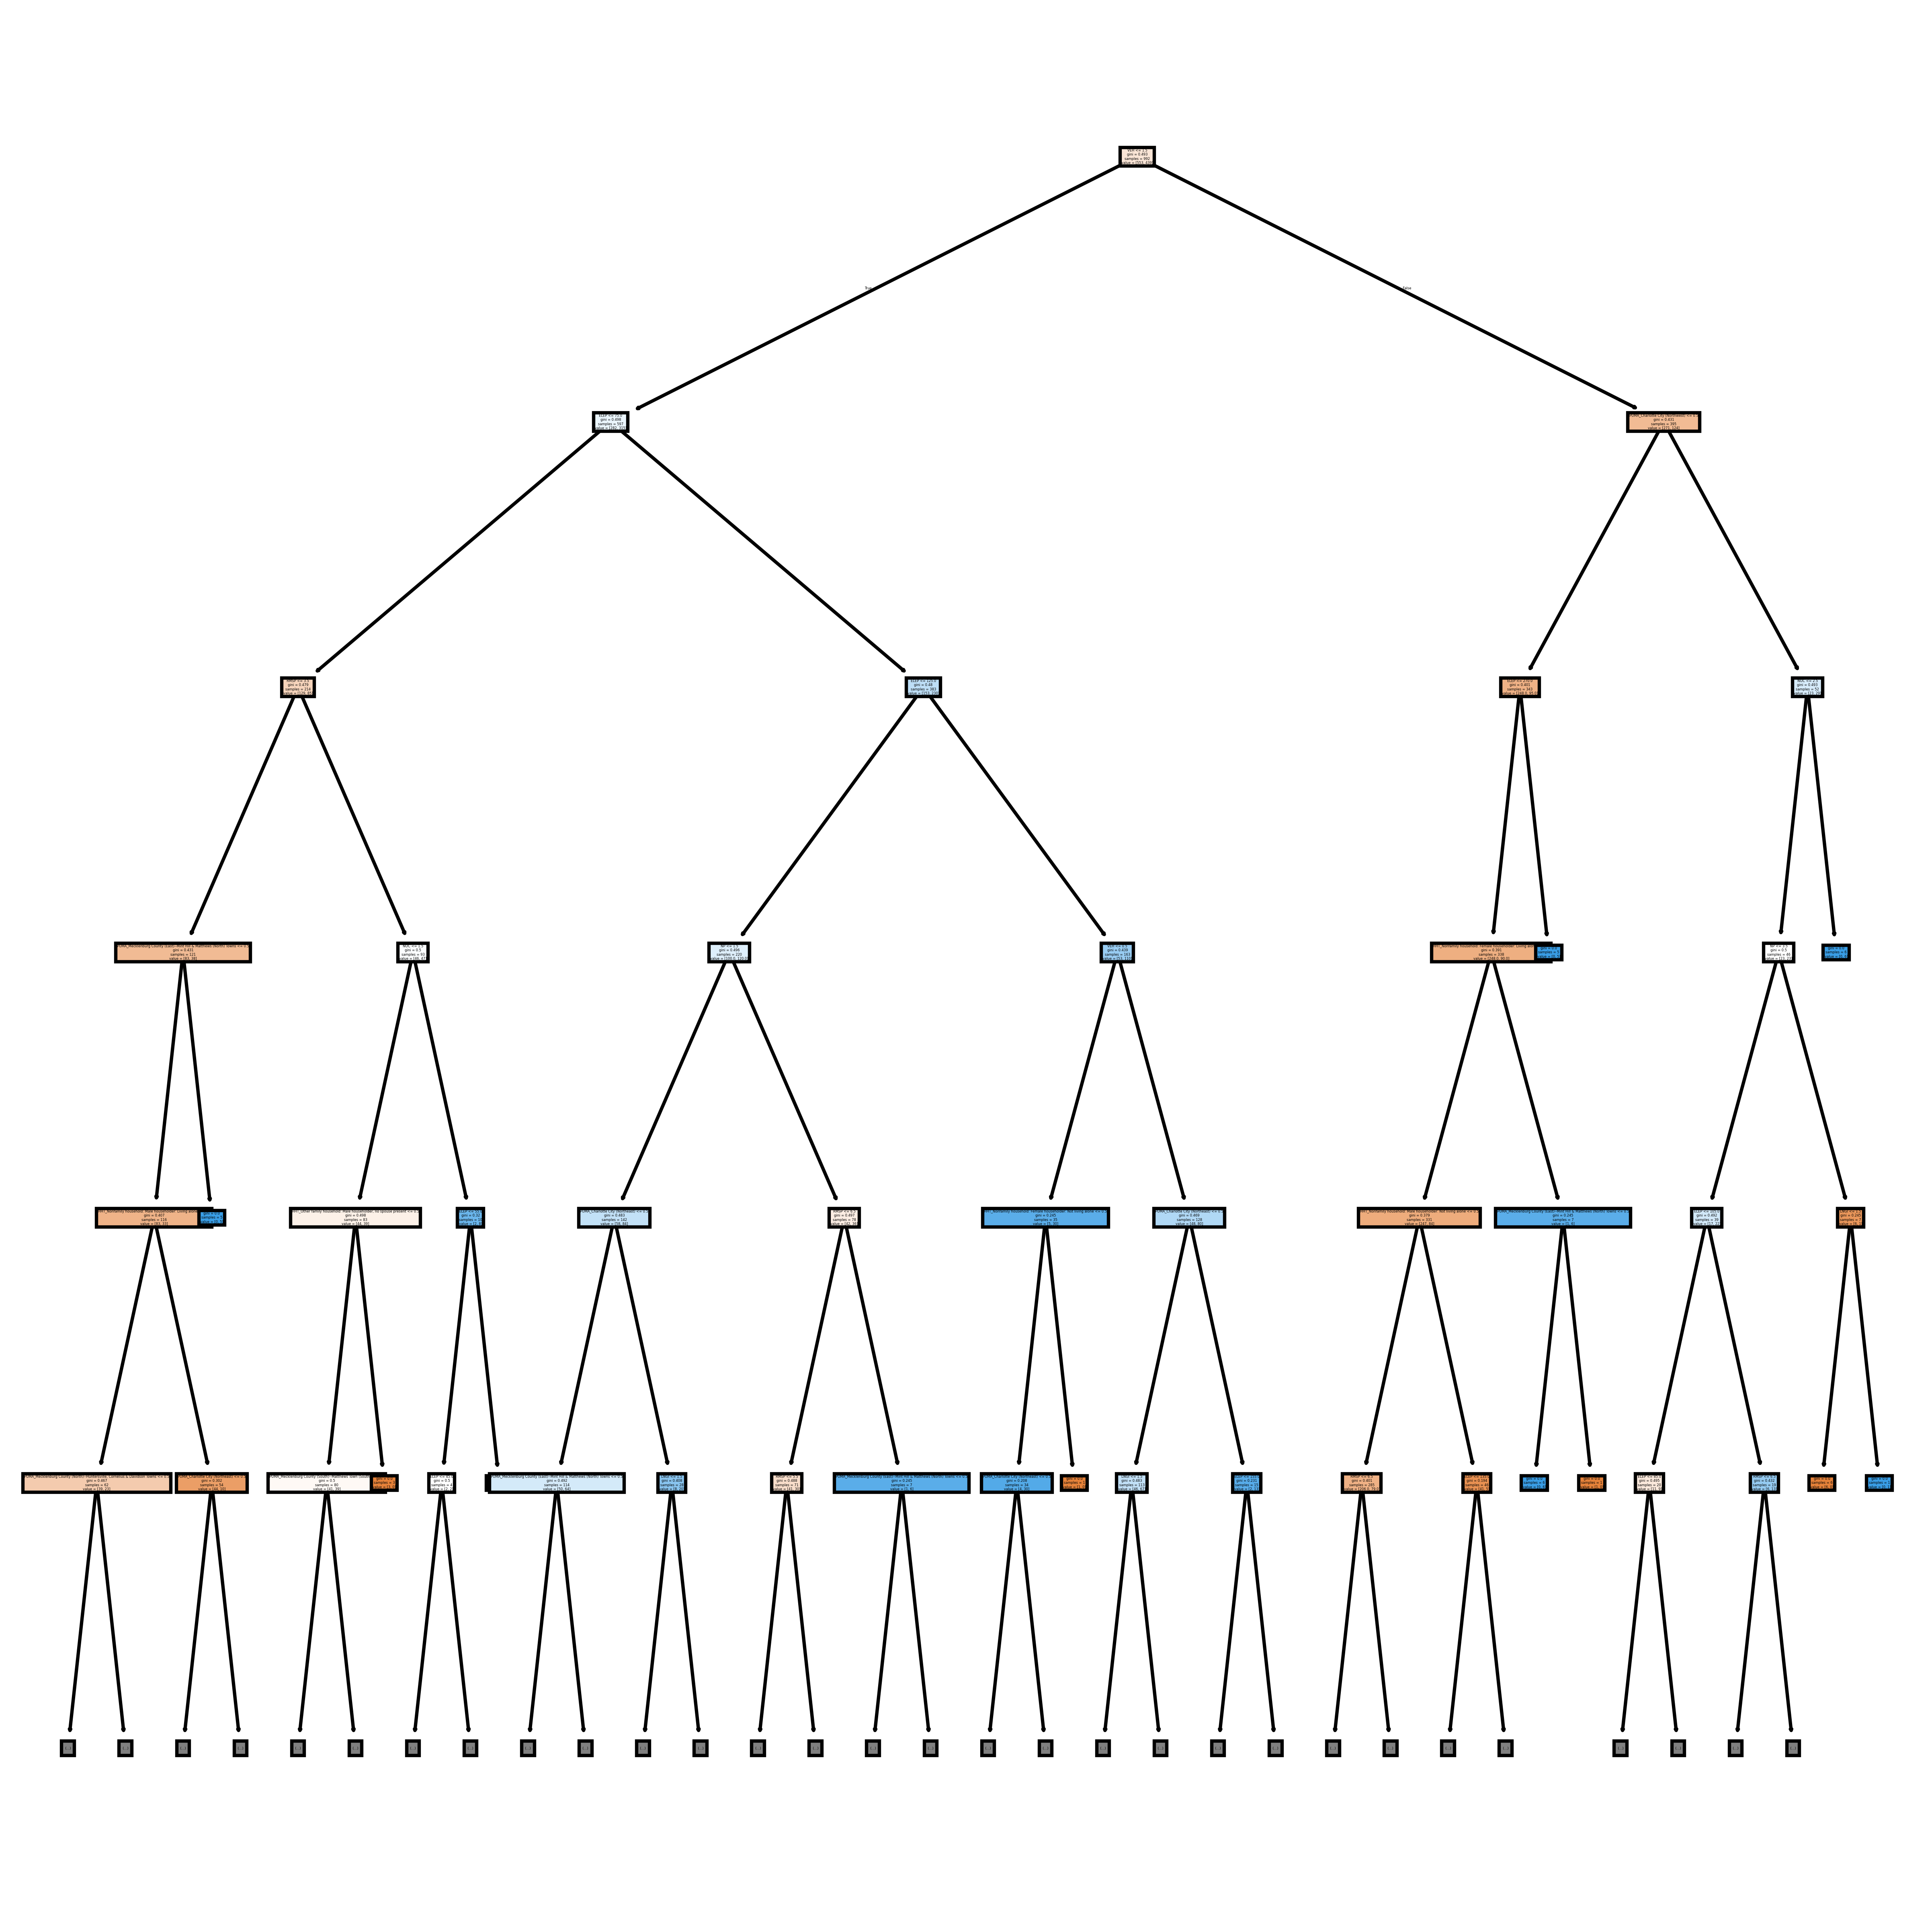

In [49]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=600)
tree.plot_tree(clf, max_depth = 5, feature_names = X.columns, filled=True)
plt.show()


Even though our raw accuracy score is not high, we can still manually analyze the decision tree to see what paths/combinations of features tend to lean towards cost-burdened or not. 

Furthermore, we can evaluate the model performance beyond just accuracy. This is important because accuracy is not a catch-all metric, it does not tell the whole story. 

Here is a small guide on how to interpret these metrics: https://www.statology.org/sklearn-classification-report/

Classification Report:

In [50]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.56      0.66      0.61       222
         1.0       0.54      0.44      0.48       204

    accuracy                           0.55       426
   macro avg       0.55      0.55      0.55       426
weighted avg       0.55      0.55      0.55       426



Based on the classification report, we can see that **the model was better at predicting that a household was NOT cost-burdened**. Whereas, it effectively was randomly guessing when it came to determining that a household is cost-burdened. 



### **Other useful features**
- **Model serialization** (Pickle files): https://scikit-learn.org/stable/model_persistence.html
    - In Python, you can serialize objects (write them to binary) so that they can be portable and used in different contexts. This can used for porting your model that was trained in a notebook setting to an application setting.
- **Hyper-parameter search**: https://scikit-learn.org/stable/modules/grid_search.html 
    - Many models have what are called hyper-parameters. Simply put, they are external parameters that can be tuned outside of the model (rather than within the main training loop). Models such as Support Vector Machines and Regularized Regression have hyper parameters. SK-Learn has a great class for conducting hyper-parameter searches.
- **Scikit-learn Pipeline**: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
    - In scikit learn you can create a pipeline class that essentially can hold a series of transformations within a single object. This object can then be treated as a single model and tuned across all transformations. For example, you could have a simple pipeline that performs (Scaling -> PCA -> Classification). 
    - You can create custom transformers and plug them into the pipeline as well. https://towardsdatascience.com/creating-custom-transformers-for-sklearn-pipelines-d3d51852ecc1
